# 소프트맥스 회귀 Softmax Regression - MNIST 데이터셋
- MNIST는 인공지능 연구의 권위자 LeCun교수가 만든 데이터셋
- 딥러닝을 공부할 떄 반드시 거쳐야 할 Hello, World 같은 존재
- MNIST는 트레이닝셋 60,000 개와 테스트셋 10,000개로 이루어져 있고 이 중 트레이닝셋을 학습데이터로 사용하고 테스트셋을 신경망을 검증하는 데 사용한다.

- 이미지를 grayscale로 변환
    - 일반 이미지는 R, G, B 세가지 색상의 조합으로 존재하기 때문에 (색상수x(가로크기x세로크기))의 3차원 데이터임
    - 이미지를 grayscale(흑백이미지)로 변경하면 색상수가 1가지로 줄어들기 때문에 (가로크기x세로크기)의 2차원 데이터로 압축됨

## 소프트맥스 회귀 (MNIST 데이터셋) 수행
### 1) 패키지 준비

In [2]:
import sys
sys.path.append('../../')
import helper

import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot as plt

# 이미지 로드를 위한 패키지 참조
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# (신규) 예제에서 사용할 데이터셋을 다운로드 받기 위한 함수
from tensorflow.keras.datasets.mnist import load_data

### 2) 데이터셋 준비

In [3]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(f'훈련데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터 {x_test.shape} 레이블 {y_test.shape}')

훈련데이터 (60000, 28, 28) 레이블 (60000,)
검증데이터 (10000, 28, 28) 레이블 (10000,)


In [4]:
x_train
# y_train
# x_test
# y_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### 3) 데이터 전처리
> 결측치 등의 데이터 이상점이 없는 예제 데이터이므로 생략

### 4) 탐색적 데이터 분석
- 임의의 샘플 데이터 확인

In [5]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [6]:
# x_train[1]의 최댓값 확인
print(np.max(x_train[1]))

255


In [7]:
for i in x_train[1]:
    for j in i:
        print('%4d' % j, end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0

In [8]:
print(y_train[1])

0


- 데이터 그려보기
    - mnist 데이터셋은 0~9까지 가로 28px, 세로 28px 크기의 이미지 60,000장 + 10,000장 데이터
    - 글자를 표현하는 간단한 이미지이므로 배경색을 단색으로 처리하고 글자가 표시되는 영역의 색상을 노란색으로 표현
    - 색상값은 0~255 사이의 10진 정수
    - 그러므로 이미지 데이터들은 이미지 픽셀 크기 만큼의 2차 배열의 각 원소가 색상값을 의미하는 숫자로 구성된 데이터로 표현 가능
    - `matplotlib.pyplot.imshow(x, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)`
        - 파라미터
            - x: array-like or PIL image
                - The image data. Supported array shapes are:
                    - (M, N): an image with scalar data. The values are mapped to colors using normalization and a colormap. See parameters norm, cmap, vmin, vmax.
                    - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
                    - (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.
                - The first two dimensions (M, N) define the rows and columns of the image.
                - Out-of-range RGB(A) values are clipped
            - cmap: str or Colormap
                - default: rcParams["image.cmap"] (default: 'viridis')
                - the Colormap instance or registered colorma name used to map scalar data to colors
                - ignored if x is RGB(A)
        - returns: AxesImage

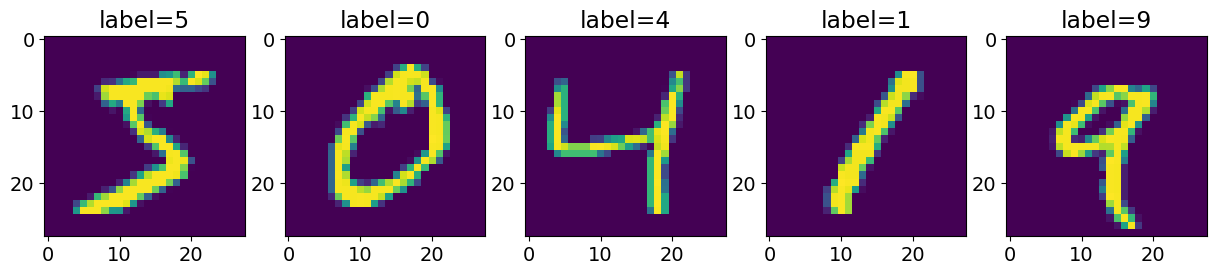

In [9]:
fig, ax = plt.subplots(1, 5, figsize = (15, 3), dpi=100)
plt.rcParams['font.family'] = 'AppleGothic'
for i in range(0,len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title('label=%d' % label)

plt.show()
plt.close()

### 5) 데이터셋 분할하기
- 랜덤시드 고정

In [10]:
np.random.seed(777)

- 훈련데이터(독립변수)와 레이블(종속변수) 구분하기
    - 처음부터 데이터셋이 구분되어 있었으므로 생략

- 훈련데이터와 검증데이터로 분할
    - 처음부터 데이터셋이 구분되어 있었으므로 생략

- 레이블에 대한 one-hot-encoding

In [11]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- 훈련, 검증용 독립변수(이미지)의 차수 재설정
    - 훈련데이터의 shape가 (60000, 28, 28)라는 것은 `가로 28`, `세로 28` 크기의 이미지가 `60000장` 이라는 의미
    - 즉, 28x28의 이차배열이 6만개가 존재한다는 의미
    - 즉, 6만개의 2차원 배열을 학습해야 하는 것보다 `6만개의 784(28*28)개의 원소를 갖는 1차원 배열을 학습하는 것`이 학습 효율이 더 좋다

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train_reshape = x_train.reshape(x_train.shape[0],
                                  x_train.shape[1] * x_train.shape[2])
x_test_reshape = x_test.reshape(x_test.shape[0],
                                x_test.shape[1] * x_test.shape[2])
print(f'훈련데이터 {x_train_reshape.shape} / 검증테이터 {x_train_reshape.shape}')
print(x_train_reshape[0])

훈련데이터 (60000, 784) / 검증테이터 (60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

- 이미지 데이터 정규화
    - 각 픽셀의 색상값은 0 ~ 255 사이의 값을 갖는다
    - 그러므로 색상값을 255로 나누면 0 ~ 1 사이의 범위를 갖도록 데이터 정규화가 수행된다

In [14]:
x_train_normal = x_train_reshape / 255
x_test_normal = x_test_reshape / 255

print(len(x_train_normal[0]))
x_train_normal[0]

784


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 6) 모델 개발
- 모델 정의

In [15]:
my_model = Sequential()
my_model.add(Dense(256, 
             activation='relu',
             input_shape=(len(x_train_normal[0]), )))
my_model.add(Dense(128, 
             activation='relu'))
my_model.add(Dense(10,
                   activation='softmax'))
my_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [16]:
result = my_model.fit(x_train_normal,
                      y_train_one_hot,
                      epochs=500,
                      validation_data=(x_test_normal,
                                       y_test_one_hot),
                      callbacks = [EarlyStopping(monitor='val_loss',
                                                 patience=5,
                                                 verbose=1),
                                   ReduceLROnPlateau(monitor = 'val_loss',
                                                     patience=3,
                                                     factor=0.5,
                                                     min_lr=0.0001,
                                                     verbose=1)])

Epoch 1/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2064 - acc: 0.9392 - val_loss: 0.1199 - val_acc: 0.9638 - lr: 0.0010
Epoch 2/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0831 - acc: 0.9743 - val_loss: 0.0791 - val_acc: 0.9746 - lr: 0.0010
Epoch 3/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0590 - acc: 0.9811 - val_loss: 0.0811 - val_acc: 0.9756 - lr: 0.0010
Epoch 4/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - acc: 0.9858 - val_loss: 0.0739 - val_acc: 0.9800 - lr: 0.0010
Epoch 5/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0346 - acc: 0.9887 - val_loss: 0.0887 - val_acc: 0.9751 - lr: 0.0010
Epoch 6/500
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - acc: 0.9904 - val_loss: 0.0826 - val_acc: 0.9769 - lr: 0.0010
Epoch 7/500
1843/1875 [============================>.] - ETA: 0s - loss: 0.0230 - acc: 0.9923
Epoch 7: ReduceLRO

### 7) 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

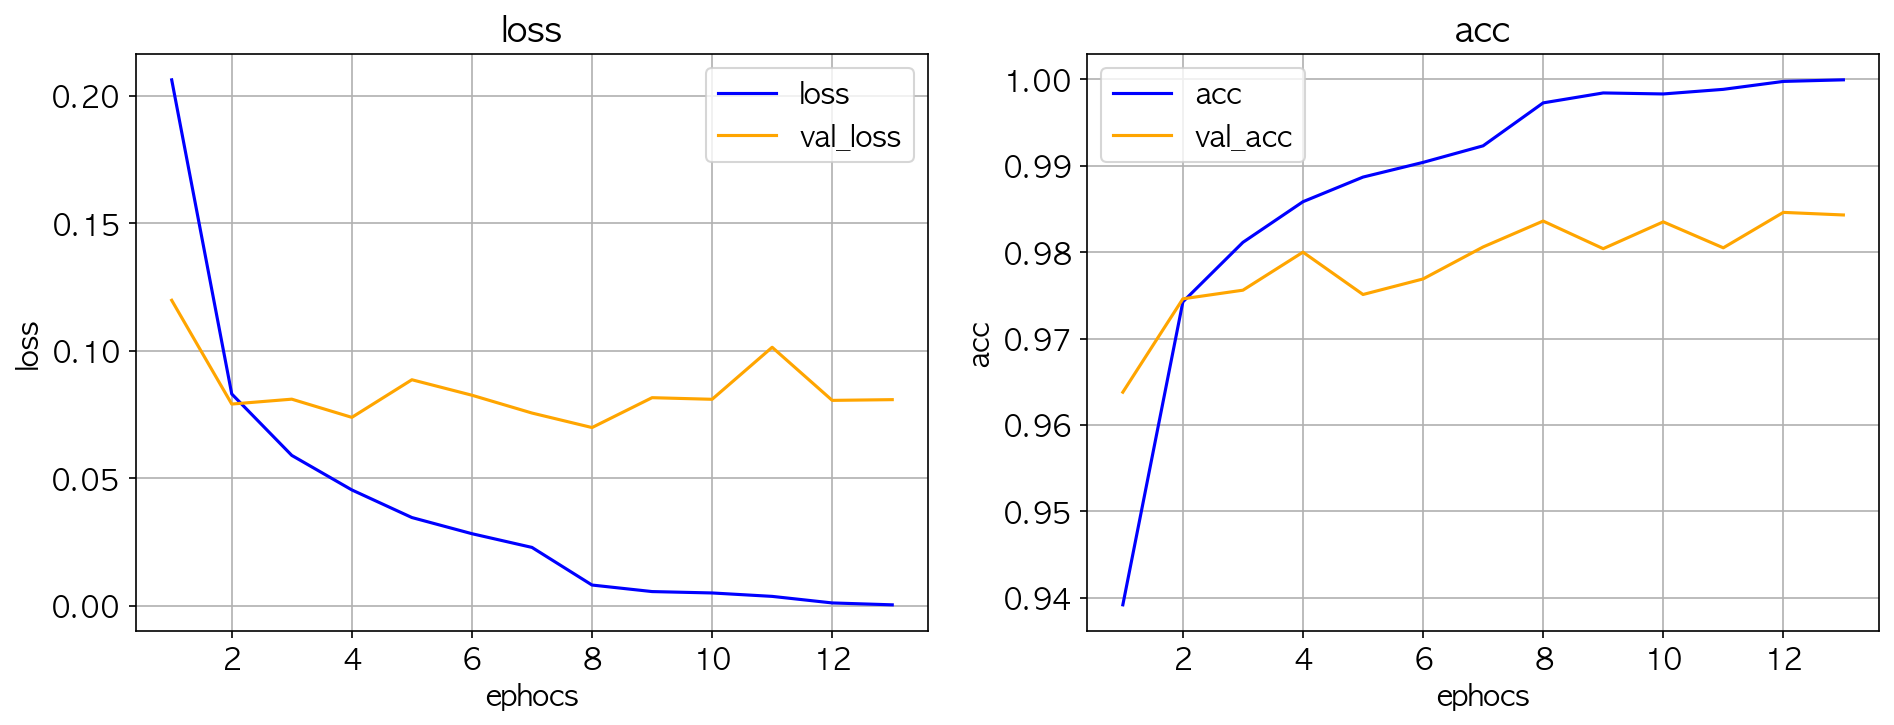

1875/1875 [==============================] - 1s 548us/step - loss: 1.6940e-04 - acc: 1.0000
최종 훈련 손실률: 0.000169, 최종 훈련 정확도: 0.999967
313/313 [==============================] - 0s 492us/step - loss: 0.0809 - acc: 0.9843
최종 검증 손실률: 0.080881, 최종 검증 정확도: 0.984300


In [17]:
helper.tf_result_plot(result)
evaluate1 = my_model.evaluate(x_train_normal, y_train_one_hot)
print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test_normal, y_test_one_hot)
print('최종 검증 손실률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [18]:
result = my_model.predict(x_test_normal)
data_count, case_count = result.shape
print('%d개의 검증 데이터가 %d개의 경우의 수를 갖는다.' % (data_count, case_count))
result[0]

313/313 [==============================] - 0s 444us/step
10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([7.70111437e-18, 1.45765622e-10, 1.97161233e-12, 8.99611427e-11,
       9.88574407e-19, 1.13382184e-17, 2.07596000e-21, 1.00000000e+00,
       1.53208931e-14, 6.00265367e-12], dtype=float32)

- 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [19]:
arg_result = np.argmax(result, axis= -1)
arg_result

array([7, 2, 1, ..., 4, 5, 6])

- 데이터 비교

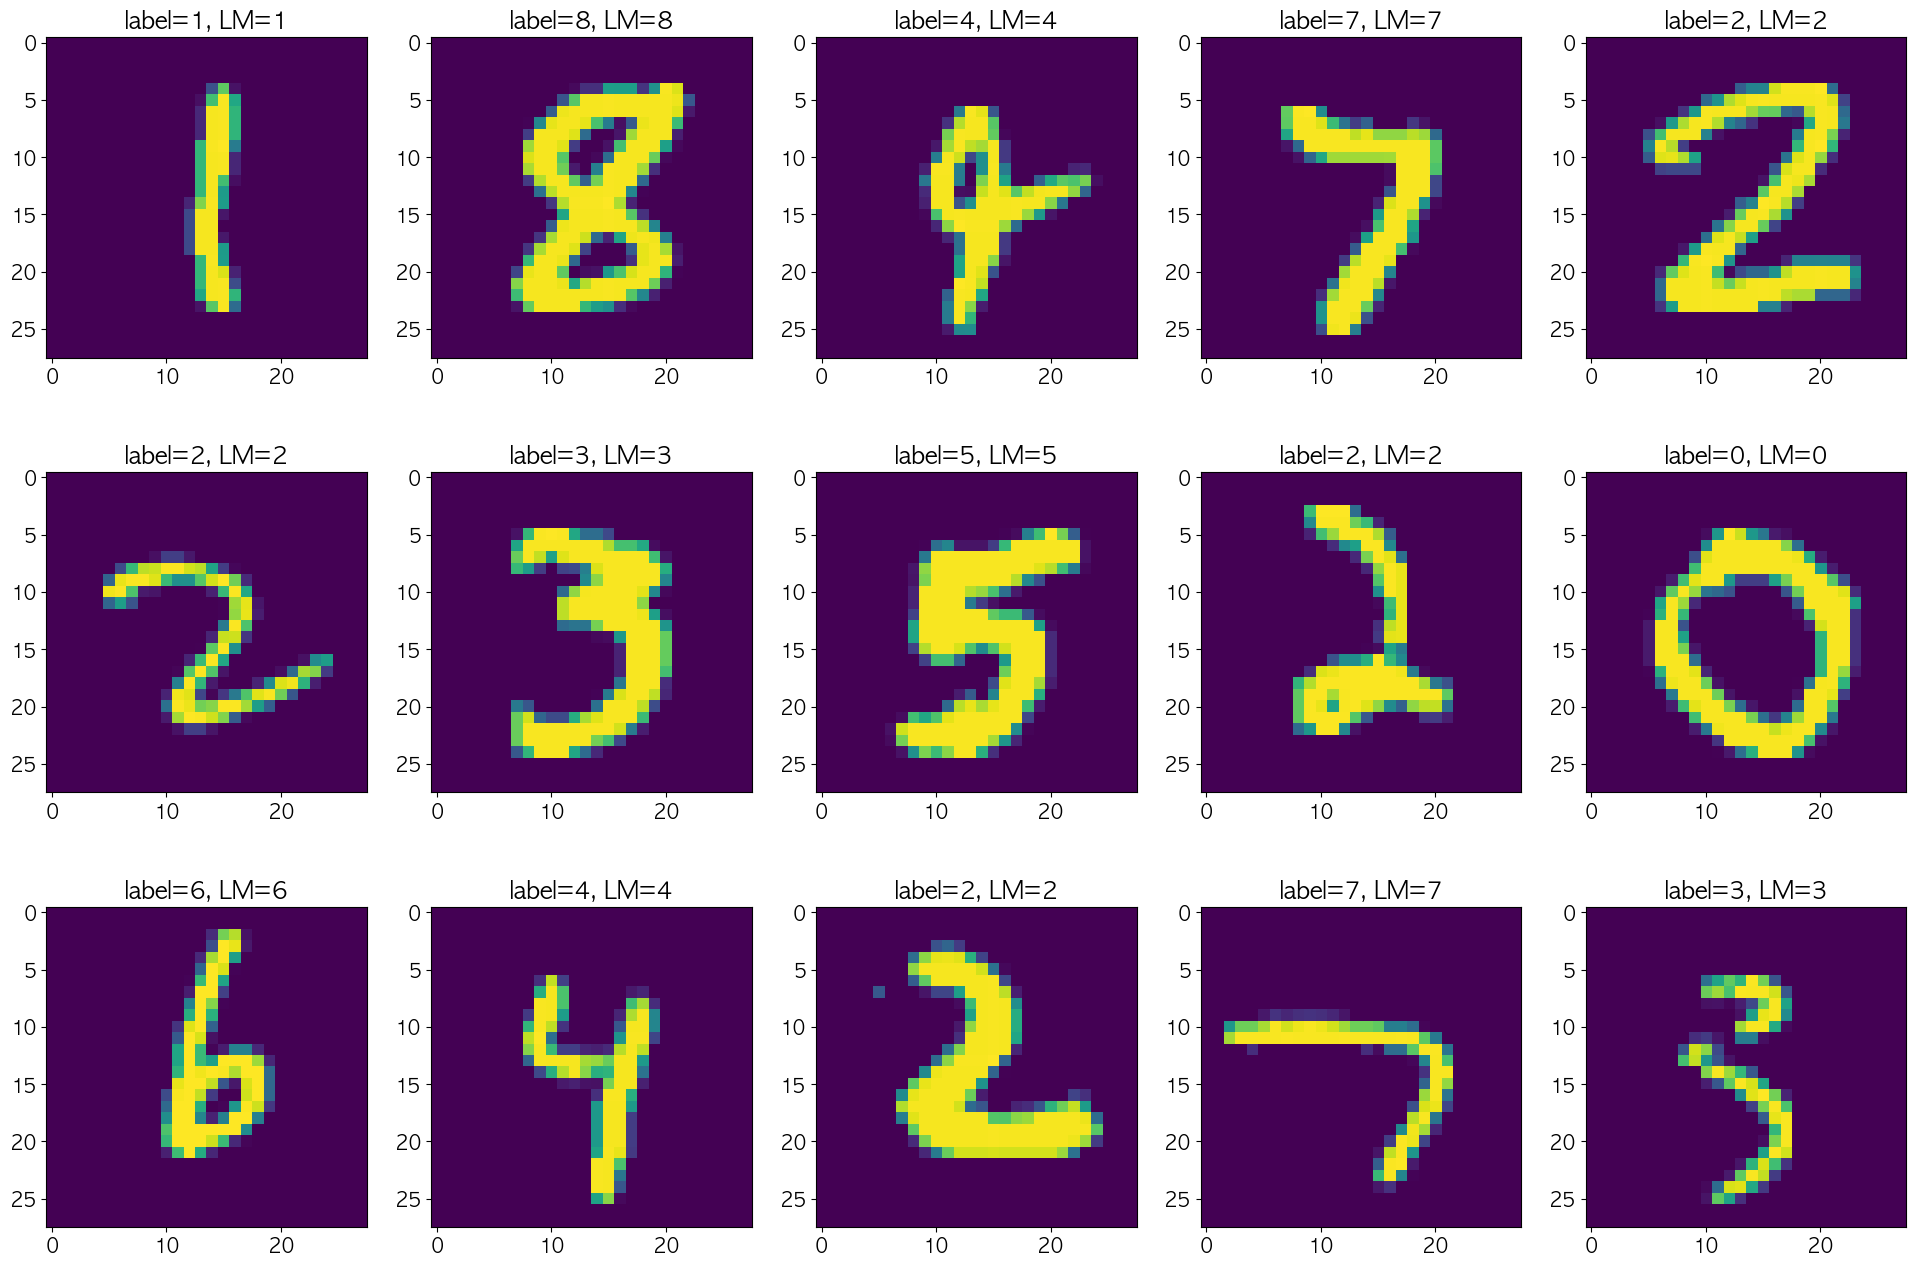

In [20]:
row = 3
col = 5
fig, ax = plt.subplots(row,
                       col,
                       figsize = ((col+1)*4,
                                  (row+1)*4),
                       dpi=100)
size = row*col
length = len(y_test)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i//col][i%col].imshow(train)
    ax[i//col][i%col].set_title('label=%d, LM=%d' % (label, arg_result[k]))
plt.show()
plt.close()

- 직접 작성한 손글씨 이미지 불러오기
    - `Image.open()`
    - 이미지 로드를 위한 패키지 (Image) 사용

In [21]:
# 첫번째 이미지
img2 = Image.open('image23_손글씨2.jpg')
print(img2)
img2

# 두번째 이미지
img3 = Image.open('image24_손글씨3.jpg')
print(img3)
img3

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x2A737D040>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x2A4944EE0>


- 이미지를 grayscale로 변환
    - `이미지.convert('L')`
    - 일반 이미지는 R, G, B 세가지 색상의 조합으로 존재하기 때문에 (색상수x(가로크기x세로크기))의 3차원 데이터임
    - 이미지를 grayscale(흑백이미지)로 변경하면 색상수가 1가지로 줄어들기 때문에 (가로크기x세로크기)의 2차원 데이터로 압축됨

In [24]:
# 첫번째 이미지의 흑백 변환
img2_gray = img2.convert('L')
print(img2_gray)
img2_gray

# 두번째 이미지의 흑백 변환
img3_gray = img3.convert('L')
print(img3_gray)
img3_gray

<PIL.Image.Image image mode=L size=28x28 at 0x2E24903A0>
<PIL.Image.Image image mode=L size=28x28 at 0x2E2490250>


- 이미지를 배열로 변환하기

In [27]:
img2_array = np.array(img2_gray)
img3_array = np.array(img3_gray)
img2_array.shape, img3_array.shape

((28, 28), (28, 28))

- 독립변수 데이터 구성하기

In [33]:
# 두 개의 이미지를 배열로 묶음
myx = np.array([img2_array, img3_array])

# 차원을 하나 줄여서 2차원 배열로 변환 -> 2x28x28 -> 2x784
myx_reshape = myx.reshape(myx.shape[0],
                          myx.shape[1] * myx.shape[2])

# 데이터 표준화
myx_normal = myx_reshape / 255
myx_normal.shape

(2, 784)

- 종속변수 데이터 구성하기

In [35]:
myy = np.array([2,3])
myy

array([2, 3])

- 구성한 데이터를 학습모델에 적용

In [36]:
result = my_model.predict(myx_normal)
data_count, case_count = result.shape
print('%d개의 검증 데이터가 %d개의 경우의 수를 갖는다.' % (data_count, case_count))
result[0]

1/1 [==============================] - 0s 15ms/step
2개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([5.1411365e-07, 5.5440487e-05, 9.9989128e-01, 1.9007462e-05,
       4.6857668e-10, 8.9504778e-07, 4.3656250e-06, 4.1077483e-06,
       2.4307670e-05, 6.1389431e-09], dtype=float32)

- 산출된 값을 통해 판별 결과 생성

In [39]:
arg_result = np.argmax(result, axis= -1)
arg_result

array([2, 3])

- 결과 출력하기

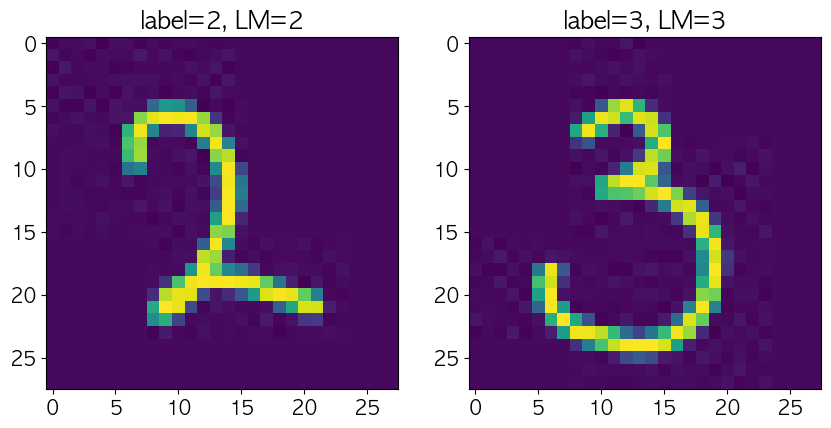

In [40]:
col = 2
fig, ax = plt.subplots(1, col, figsize=(10, 5), dpi=100)

length = len(y_test)

for i in range(0, len(ax)):
    train = myx[i]
    label = myy[i]
    ax[i].imshow(train)
    ax[i].set_title('label=%d, LM=%d' % (label, arg_result[i]))
plt.show()
plt.close()